<a href="https://colab.research.google.com/github/Logesh7-R/Data-Science---ML/blob/main/project_stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.drop(['id'], axis=1,inplace = True)
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3822,Female,32.0,0,0,Yes,Private,Urban,100.01,37.2,never smoked,0
229,Female,80.0,1,0,No,Private,Urban,66.03,35.4,never smoked,1
2902,Male,78.0,1,1,Yes,Self-employed,Rural,106.41,27.3,never smoked,0
2952,Male,34.0,0,0,No,Govt_job,Urban,72.75,22.2,Unknown,0
1530,Female,49.0,0,0,Yes,Private,Urban,101.02,24.2,smokes,0


In [ ]:
'''1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient'''

'1) id: unique identifier\n2) gender: "Male", "Female" or "Other"\n3) age: age of the patient\n4) hypertension: 0 if the patient doesn\'t have hypertension, 1 if the patient has hypertension\n5) heart_disease: 0 if the patient doesn\'t have any heart diseases, 1 if the patient has a heart disease\n6) ever_married: "No" or "Yes"\n7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"\n8) Residence_type: "Rural" or "Urban"\n9) avg_glucose_level: average glucose level in blood\n10) bmi: body mass index\n11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*\n12) stroke: 1 if the patient had a stroke or 0 if not\n*Note: "Unknown" in smoking_status means that the information is unavailable for this patient'

In [ ]:
df1 = df[ df.isnull().any(axis=1)]
df1.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1214,Male,51.0,0,0,Yes,Private,Rural,217.71,NaN,formerly smoked,0
50,Female,76.0,0,0,No,Private,Urban,89.96,NaN,Unknown,1
2529,Female,71.0,1,0,Yes,Private,Urban,105.55,NaN,smokes,0
1539,Male,30.0,0,0,Yes,Private,Urban,91.23,NaN,smokes,0
46,Female,75.0,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1


In [ ]:

df1 = df1[df1['stroke']==1]
df1.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
161,Male,71.0,0,1,Yes,Private,Urban,81.76,NaN,smokes,1
146,Male,65.0,0,0,Yes,Self-employed,Urban,68.43,NaN,formerly smoked,1
227,Male,74.0,0,0,Yes,Self-employed,Rural,60.98,NaN,never smoked,1
218,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,NaN,smokes,1
51,Male,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [ ]:
df1.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status        0
stroke                0
dtype: int64

In [ ]:
df1['bmi'].fillna(df['bmi'].median(),inplace=True)


In [ ]:
df1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.shape

(5110, 11)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(4909, 11)

In [ ]:
df3=pd.concat([df,df1]).reset_index

In [ ]:
df = pd.DataFrame(df3())

In [ ]:
df.drop(columns=['index'],inplace=True)
df.shape


(4949, 11)

In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4944,Male,79.0,0,0,Yes,Private,Rural,114.77,28.1,formerly smoked,1
4945,Male,74.0,0,0,Yes,Private,Urban,167.13,28.1,Unknown,1
4946,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,28.1,smokes,1
4947,Male,74.0,0,0,Yes,Self-employed,Rural,60.98,28.1,never smoked,1
4948,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.1,Unknown,1


In [ ]:
df.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000
mean,43.066971,0.092342,0.050515,105.439725,28.886826,0.050313
std,22.611096,0.289537,0.219028,44.574415,7.822578,0.218613
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.040000,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.650000,33.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<ipython-input-25-7503d963d692>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

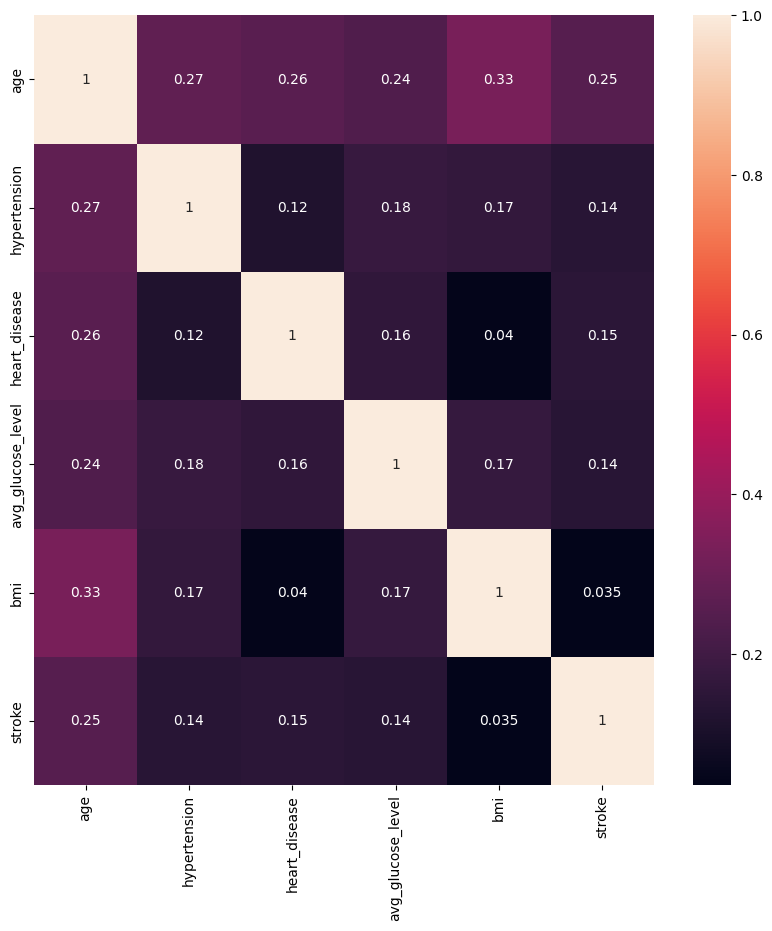

In [ ]:
corr = df.corr()
fig,axes = plt.subplots(figsize=(10,10))
sns.heatmap(corr , annot = True)

In [ ]:
df.columns.to_list(),df.dtypes

(['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status',
  'stroke'],
 gender                object
 age                  float64
 hypertension           int64
 heart_disease          int64
 ever_married          object
 work_type             object
 Residence_type        object
 avg_glucose_level    float64
 bmi                  float64
 smoking_status        object
 stroke                 int64
 dtype: object)

In [ ]:
enc = LabelEncoder()
df['gender'] = enc.fit_transform(df['gender'].values.reshape(-1,1))
df['ever_married'] = enc.fit_transform(df['ever_married'].values.reshape(-1,1))
df['work_type'] = enc.fit_transform(df['work_type'].values.reshape(-1,1))
df['Residence_type'] = enc.fit_transform(df['Residence_type'].values.reshape(-1,1))
df['smoking_status'] = enc.fit_transform(df['smoking_status'].values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

<Axes: >

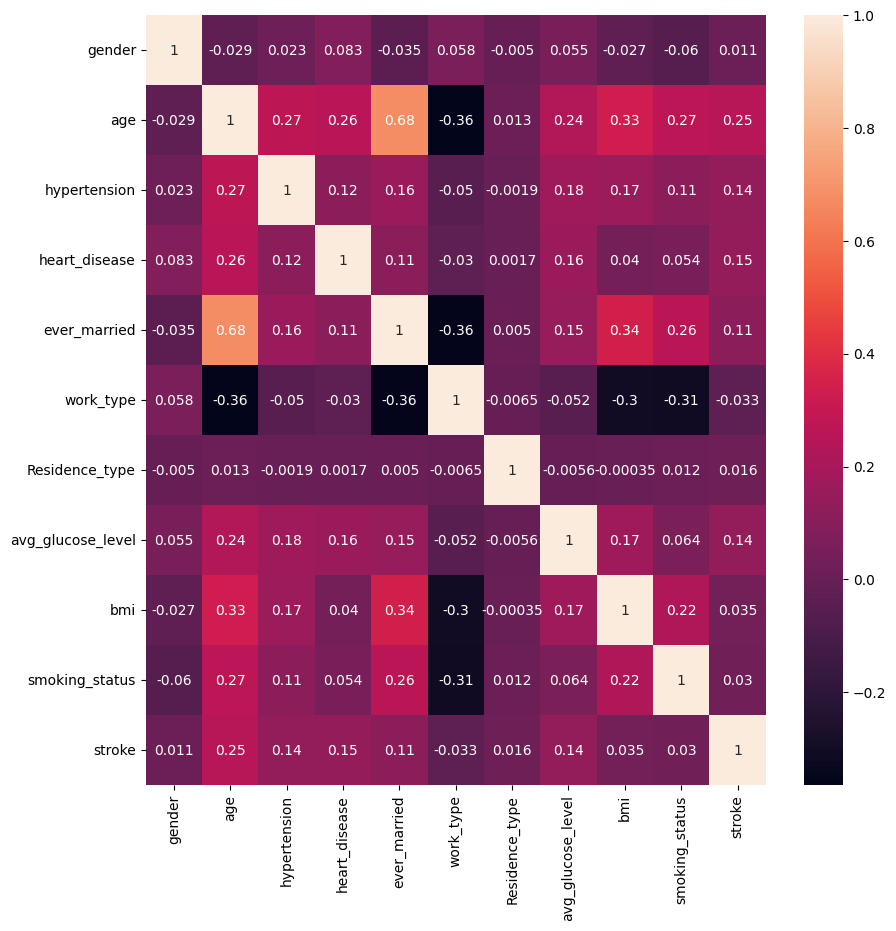

In [ ]:
corr = df.corr()
fig,axes = plt.subplots(figsize=(10,10))
sns.heatmap(corr , annot = True)

(array([4700.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

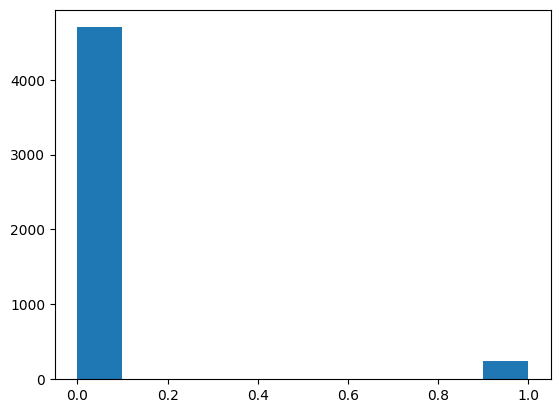

In [ ]:
plt.hist(df['stroke'])

<Axes: xlabel='heart_disease'>

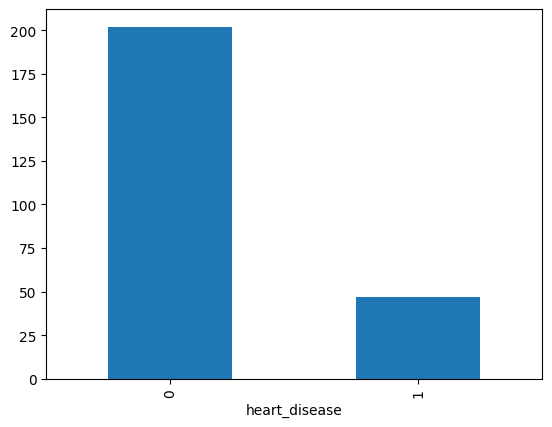

In [ ]:
df.groupby("heart_disease")['stroke'].sum().plot.bar()

<Axes: xlabel='gender'>

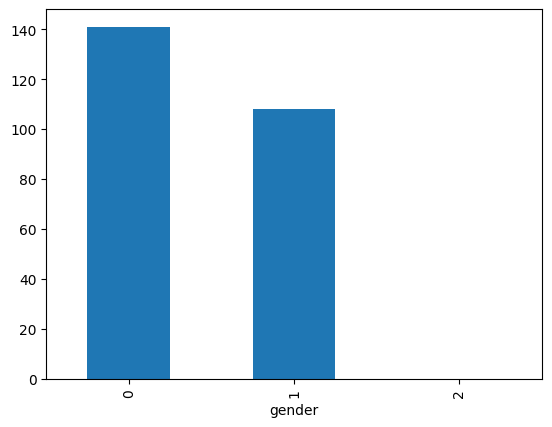

In [ ]:
df.groupby("gender")['stroke'].sum().plot.bar()

In [ ]:
df['stroke'].value_counts()

0    4700
1     249
Name: stroke, dtype: int64

In [ ]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028758,0.023193,0.083114,-0.034934,0.058480,-0.004958,0.054942,-0.026671,-0.059699,0.010821
age,-0.028758,1.000000,0.274359,0.257960,0.678785,-0.364937,0.013275,0.235706,0.330315,0.268509,0.251066
hypertension,0.023193,0.274359,1.000000,0.117642,0.161420,-0.050185,-0.001860,0.176486,0.166578,0.111414,0.137318
heart_disease,0.083114,0.257960,0.117642,1.000000,0.107532,-0.029912,0.001668,0.158096,0.040329,0.053774,0.145288
ever_married,-0.034934,0.678785,0.161420,0.107532,1.000000,-0.356555,0.004969,0.152028,0.340328,0.262372,0.110952
work_type,0.058480,-0.364937,-0.050185,-0.029912,-0.356555,1.000000,-0.006494,-0.051842,-0.303884,-0.307645,-0.033213
Residence_type,-0.004958,0.013275,-0.001860,0.001668,0.004969,-0.006494,1.000000,-0.005572,-0.000354,0.011776,0.015554
avg_glucose_level,0.054942,0.235706,0.176486,0.158096,0.152028,-0.051842,-0.005572,1.000000,0.173892,0.063516,0.139978
bmi,-0.026671,0.330315,0.166578,0.040329,0.340328,-0.303884,-0.000354,0.173892,1.000000,0.223945,0.035416
smoking_status,-0.059699,0.268509,0.111414,0.053774,0.262372,-0.307645,0.011776,0.063516,0.223945,1.000000,0.029946


In [ ]:

list = df.columns.to_list()
list.remove('id')
list.remove('stroke')
list.remove('work_type')

x = df[list]


y = df['stroke']
x.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,171.23,34.4,3
3,0,79.0,1,0,1,0,174.12,24.0,2
4,1,81.0,0,0,1,1,186.21,29.0,1


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [ ]:
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size=0.2,random_state=56)

In [ ]:
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_test = sc.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import tree

In [ ]:
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
y_lr_pre = lr.predict(x_test)
y_lr_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_tr,y_tr)
y_dt_pre = dt.predict(x_test)
y_dt_pre

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
'''plt.figure(figsize=(50,30))
tree.plot_tree(dt,fontsize=20, feature_names = list)'''

'plt.figure(figsize=(50,30))\ntree.plot_tree(dt,fontsize=20, feature_names = list)'

In [ ]:
rf = RandomForestClassifier(n_estimators=45)
rf.fit(x_tr,y_tr)
y_rf_pre = dt.predict(x_test)
y_rf_pre

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy_lr=accuracy_score(y_lr_pre, y_test)*100
accuracy_dt=accuracy_score(y_dt_pre, y_test)*100
accuracy_rf=accuracy_score(y_rf_pre, y_test)*100
matrix_lr=confusion_matrix(y_test, y_lr_pre)
matrix_dt=confusion_matrix(y_test, y_dt_pre)
matrix_rf=confusion_matrix(y_test, y_rf_pre)

In [ ]:
print(f'accuracy score of Logistic Regression:\n{accuracy_lr}\n\naccuracy score of Decision Tree:\n{accuracy_dt}\n\naccuracy score of Random Forest:\n{accuracy_rf}')

accuracy score of Logistic Regression:
94.84848484848484

accuracy score of Decision Tree:
91.31313131313131

accuracy score of Random Forest:
91.31313131313131


Text(0.5, 1.0, 'Random Forest')

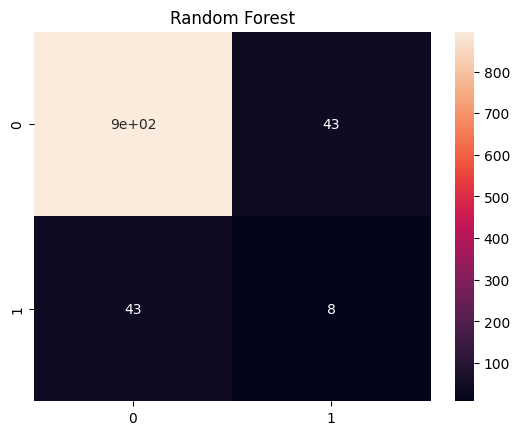

In [ ]:
import seaborn as sns
sns.heatmap(matrix_rf, annot=True)
plt.title('Random Forest')

Text(0.5, 1.0, 'Decision Tree')

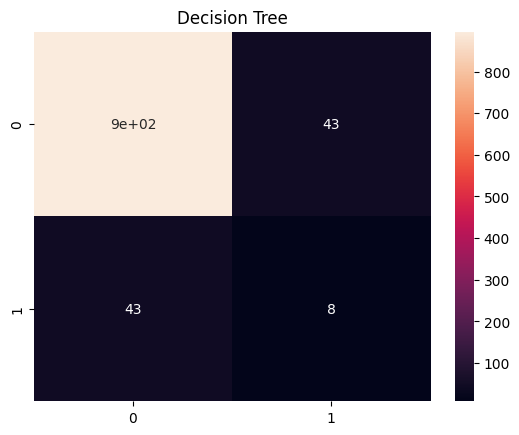

In [ ]:
import seaborn as sns
sns.heatmap(matrix_dt, annot=True)
plt.title('Decision Tree')

Text(0.5, 1.0, 'Logistic regression')

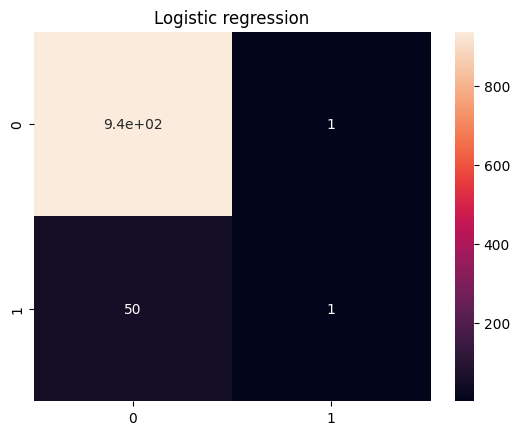

In [ ]:
import seaborn as sns
sns.heatmap(matrix_lr, annot=True)
plt.title('Logistic regression')